<a href="https://colab.research.google.com/github/missanjali456/EDA/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All Datsets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

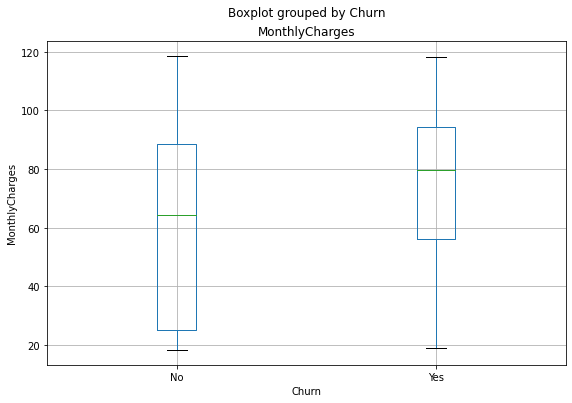

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges',by = 'Churn',ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

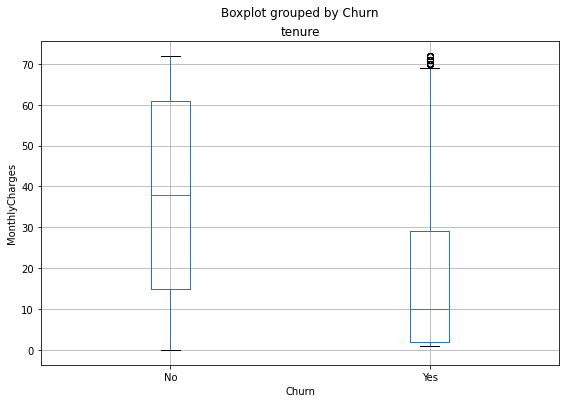

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column = 'tenure',by = 'Churn',ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show

In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df['class'] = df['Churn'].apply(lambda x: 1 if x=="Yes" else 0)
#features will be saved as x and our target will be saved as y
x = df[['tenure','MonthlyCharges']]
y = df['class']

In [ ]:
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [ ]:
x.shape

(7043, 2)

In [ ]:
y.shape

(7043,)

In [ ]:
#performing train test slit
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 2)
(1409, 2)
(5634,)
(1409,)


In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_train.head()

1814    0
5946    1
3881    0
2389    0
3676    0
Name: class, dtype: int64

In [ ]:
y_train.value_counts()

0    4113
1    1521
Name: class, dtype: int64

question = how to overocme embalance data
--0 oversambling
---0 udersambling
--0smote

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept= True, max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.coef_

array([[-0.05474134,  0.03325319]])

In [ ]:
clf.intercept_

array([-1.79926124])

# evaluating the performance of the trained mdoel

In [ ]:
#get the predicted probabilities
train_preds = clf.predict_proba(x_train)
test_preds = clf.predict_proba(x_test)

In [ ]:
train_preds
# probability of 0 1

array([[0.85827906, 0.14172094],
       [0.83766911, 0.16233089],
       [0.97123616, 0.02876384],
       ...,
       [0.45441597, 0.54558403],
       [0.52492189, 0.47507811],
       [0.60003051, 0.39996949]])

In [ ]:
test_preds

array([[0.80033486, 0.19966514],
       [0.8815366 , 0.1184634 ],
       [0.72307447, 0.27692553],
       ...,
       [0.98000129, 0.01999871],
       [0.92456045, 0.07543955],
       [0.32407246, 0.67592754]])

In [ ]:
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)

In [ ]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_train.iloc[:11]

1814    0
5946    1
3881    0
2389    0
3676    0
611     1
588     0
2687    0
1550    0
2890    1
1072    0
Name: class, dtype: int64

In [ ]:
train_class_preds

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
#get the accuracy score
train_accuracy = accuracy_score(train_class_preds ,y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [ ]:
train_accuracy

0.7797302094426695

In [ ]:
test_accuracy

0.7970191625266146

[[3714  399]
 [ 842  679]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

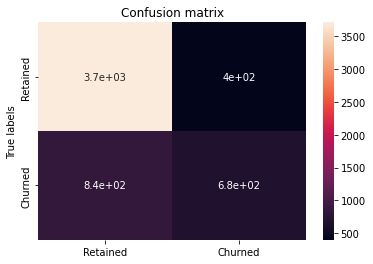

In [ ]:
#Get the confusion metrics
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm ,annot=True ,ax=ax) 

#labels
ax.set_label('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels) # 3714=TN(max) 399=FP(min)
                                 # 819=FN(min) TP=682(max)

In [ ]:
#f1-score = harmonic mean of precision and recall
from sklearn.metrics import precision_score, recall_score

train_precision = precision_score(y_train, train_class_preds)
test_precision = precision_score(y_test ,test_class_preds)

In [ ]:
train_precision

0.6298701298701299

In [ ]:
test_precision

0.6220472440944882

In [ ]:
train_recall = recall_score(y_train , train_class_preds)
test_recall = recall_score(y_test,test_class_preds)

In [ ]:
train_recall

0.44641683103221563

In [ ]:
test_recall

0.4540229885057471